#  <font color="green"><center>PROYECTO DE APLICACIÓN: MANEJO DE DATOS, SIMILITUD yCLUSTERING</center></font>
## <font color="cian"><center>Ciencia de Datos e Inteligencia de Negocios</center></font>


### Integrantes:
* HUMBERTO ORTIZ ESPINOSA
* MONTSERRAT ORTIZ PONTES
* MARIAN MICHELLE ROMO MARTINEZ


## <font color="blue">Introducción</font>

In [23]:
import pandas as pd
import numpy as np
from CDIN import CDIN as cd

In [2]:
import string
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../Data/data.csv')
data

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,...,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
dqr = cd.dqr(data)
dqr

In [5]:
data.fillna('UNKNOWN',inplace=True)

In [6]:
data

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,UNKNOWN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,UNKNOWN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,...,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,...,1,0,0,0,0,0,0,0,0,0


Se han limpiado los datos NaN por UNKNOWN al no conocer el tipo de modelo de la aereonave o pájaro en los incidentes reportados.

In [ ]:
data.columns 

In [ ]:
data['Aircraft Damage']


## Insights:

In [ ]:
data.describe() 


Podemos observar y analizar la descripción de los datos para entender las similitudes y poder hacer un análisis más completo, como:

In [ ]:
year=data['Incident Year'].value_counts()
year.head()

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(data['Incident Year'], bins=90)
plt.xlabel('Incident Year', fontsize=30)
plt.ylabel('Aircraft Damage', fontsize=30)
plt.grid()
plt.show()

<div style="text-align: justify">Este gráfico nos muestra el número de accidentes de aeronaves por año; con esto vemos que en el 2014 hubo una gran cantidad de daños si lo comparamos con 2013 y 2015. Además, podemos notar como incrementan los daños de manera significativa cada año, esto podría deberse a que el número de vuelos anuales también incrementa.</div>

In [ ]:
month=data['Incident Month'].value_counts()
month.head()

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(data['Incident Month'], bins=30, color='Red')
plt.xlabel('Incident Month', fontsize=20)
plt.ylabel('Aircraft Damage', fontsize=30)
plt.grid()
plt.show()

<div style="text-align: justify">En este grafico podemos ver que los meses que presentan más daño en las aeronaves desde 1995 hasta el 2015 son agosto y septiembre. Una teoría valida podría ser por la cantidad de pájaros que migran en otoño.</div>

In [ ]:
data['Species Name'].describe()


In [ ]:
data['Species Name'].value_counts()

<div style="text-align: justify">Podemos ver que tipo de pájaros son los que hacen más daños reportados a las aeronaves. También se observa que hay una gran diferencia entre los animales descritos; en algunos casos son bastante específicos y en otros casos los describen como (por ejemplo) 'Pájaro mediano desconocido '.</div>

In [ ]:
data['Flight Impact'].value_counts()

In [ ]:
data['Injuries'].value_counts()

In [ ]:
data['Fatalities'].value_counts()

In [ ]:
df_perdidas=data[['Incident Year','Flight Impact','Fatalities','Injuries']]
df_perdidas

<div style="text-align: justify">En la información pasada analizamos las lecciones, aterrizaje forzoso y perdidas humanas; con un conteo de valores y luego una tabla para saber en que año pasaron y la relación que presentan. Se desprecia un poco daddo que son múltiples datos y que la gran mayoría son 0 o desconocidos.</div>

In [ ]:
plt.figure(figsize=(14,10))
plt.hist(data['Flight Impact'], bins=20, color='Green')
plt.xlabel('Rason ', fontsize=20)
plt.ylabel('Cantidad ', fontsize=20)
plt.grid()
plt.show()

<div style="text-align: justify">En esta tabla podemos ver la cantidad de veces que las aeronaves han tenido un o ningún problema al momento de tener un aterrizaje forzoso. Al ser un error aterrizar forzosamente, la mayoría de las veces vemos que no está registrado o es desconocido; también podemos ver que la gran mayoría de los vuelos no tuvo que recurrir a un aterrizaje forzoso.</div>

## Matriz de similitud:

In [7]:
data

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,UNKNOWN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,UNKNOWN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,...,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,...,1,0,0,0,0,0,0,0,0,0


Como podemos observar nuestra base de datos contiene datos mixtos, para lograr procesar los datos de mejor manera y calcular la matriz de similitud, seleccionaremos ciertas columnas que creemos importantes.

In [8]:
# Selección de columnas importantes de la base de datos 
inicial = np.array([0,1,4])
fin = np.arange(36, data.shape[1])
data_sel = np.append(inicial, fin)

array([ 0,  1,  4, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])

In [9]:
# Selección de datos
data_2 = data.iloc[:, data_sel]
data_2

,Record ID,Incident Year,Operator ID,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,DAL,1,1,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,HAL,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,UNK,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,MIL,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,MIL,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,SWA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,SWA,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,BUS,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,QXE,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Aún con ese filtro, la base de datos contiene mucha información y los pogramas no pueden con la carga, por lo que importaremos la función sample, que ayudara a realizar un filtro aleatorio de filas para poder analizar nuestra matriz de manera mas eficiente. 

Para poder seleccionar la cantidad de filas, observamos el limite de nuestros dispositivos, donde la cantidad límite del procesamiento de datos fue del 17% (30 000 filas).

In [10]:
import random
from random import sample

In [11]:
# Filtro de filas para realizar la matriz de similitud
df = data_2.sample(n=30000)
df.sort_values(by='Incident Year', ascending=True)

,Record ID,Incident Year,Operator ID,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
1104,125538,1990,AAL,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
803,101266,1990,AAL,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1521,100614,1990,EAL,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1882,106918,1990,AAL,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1569,101346,1990,NWA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166687,360896,2015,UNK,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164336,357704,2015,BUS,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
166955,360545,2015,SKW,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
172354,364545,2015,RPA,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Después de analizar la selección anterior, realizamos un tercer filtro para obtener solo datos binarios y poder realizar nuestra matriz de similitud.

In [12]:
# Base de datos binarios
data_sim = df.iloc[:,3:]
data_sim

,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
29176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153631,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172497,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148688,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Para calcular la matriz de similitud, como los datos que tenemos son binarios, se seleccionó el método de jaccard. Este toma en cuenta valores entre 0 y 1, así como el grado de similitud entre los datos, en este caso las aeronaves.

In [13]:
import scipy.spatial.distance as sc

In [14]:
# Matriz de similitud para datos binarios Jaccard
def pdistance(df, metric):
    dist = sc.pdist(df, metric)
    #Matriz de distancias de similitud
    DIST = pd.DataFrame(sc.squareform(dist))
    
    return DIST

In [15]:
# Matriz de similidtud Jaccard
pdistance(data_sim, 'jaccard')

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.000000,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.000000,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
29996,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4,1.0,0.8,...,1.0,0.857143,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
29997,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
29998,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


## Clusters:

In [7]:
from scipy.cluster import hierarchy

In [8]:
data

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,UNKNOWN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,UNKNOWN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,...,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,...,1,0,0,0,0,0,0,0,0,0


<div style="text-align: justify">Debido a que son demasiados datos, y nuestras computadoras no tienen la "fuerza" para correrlos todos, lo que hicimos fue elegir una muestra de $10000$ (fuimos cambiando la cantidad de datos hasta que nuestra computadora pudiera) datos para poder realizar las agrupaciones correspondientes.</div>

In [9]:
dfc = data.sample(n=10000)
dfc = dfc.sort_values(by='Record ID', ascending=True)
dfc

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
18401,1017,1996,9,9,MIL,MILITARY,T-1A,A,748,UNKNOWN,...,0,0,0,0,0,0,0,0,0,0
782,1044,1990,7,30,MIL,MILITARY,T-37B,UNKNOWN,UNKNOWN,UNKNOWN,...,0,0,0,0,0,0,0,0,0,0
271,1049,1990,5,15,MIL,MILITARY,KC-135E,A,148,UNKNOWN,...,0,0,0,0,0,0,0,0,0,0
7618,1075,1993,1,6,MIL,MILITARY,KC-135R,A,148,UNKNOWN,...,1,0,0,0,0,0,0,0,0,0
17760,1077,1996,7,24,MIL,MILITARY,KC-135,A,148,UNKNOWN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173320,367360,2015,9,15,UNK,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,...,0,0,0,0,0,0,0,0,0,0
173287,367399,2015,9,14,UNK,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,...,0,0,0,0,0,0,0,0,0,0
173317,367402,2015,9,15,AAL,AMERICAN AIRLINES,A-321,A,04A,7,...,0,0,0,0,0,0,0,0,0,0
173339,367425,2015,9,15,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0


<div style="text-align: justify">Teniendo ahora si los datos para trabajar, escogimos 2 columnas para poder agruparlas y sacar un cluster. Realizamos 3 ejemplos, cada uno con diferente métrica y método de clusterización para ver las diferencias.</div>

<div style="text-align: justify">En este primer ejemplo elegimos las columnas de 'Incident Year' e 'Incident Month' como nuestras variables. Posteriormente, aplicamos el método de `Clusterización Jerárquica (Hierarchical clustering)` y, con este agrupamiento, graficamos el resultado en forma de dendrograma.</div>

In [12]:
data_cluster = dfc.loc[:, ['Incident Month', 'Incident Year']].values
data_cluster

array([[   9, 1996],
       [   7, 1990],
       [   5, 1990],
       ...,
       [   9, 2015],
       [   9, 2015],
       [   9, 2015]], dtype=int64)

In [13]:
z = hierarchy.linkage(data_cluster, metric = 'jaccard', method = 'complete')

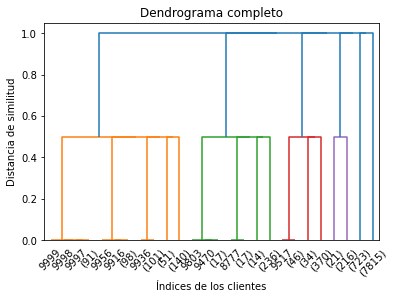

In [19]:
dn = hierarchy.dendrogram(z, truncate_mode = 'level', p = 4)

plt.title('Dendrograma completo')
plt.xlabel('Índices de los clientes')
plt.ylabel('Distancia de similitud')
plt.show()

<div style="text-align: justify">El dendrograma muestra diversas agrupaciones, sin embargo, debido a la cantidad de muestra que son, no se termina de apreciar del todo bien, por lo que aplicamos el criterio del codo y del gradiente para ver que cantidad de grupos es el óptimo para este agrupamiento.</div>

In [25]:
def criterio_gradiente(z, n_grupos):
    last = z[-n_grupos:, 2]
    gradiente = np.diff(last)
    grad_rev = gradiente[::-1]

    indx_group = np.arange(1, len(grad_rev) + 1)
    
    plt.plot(indx_group, grad_rev)
    plt.xlabel('Número de grupos')
    plt.ylabel('Gradiente inercia de las diferencias entre grupos')
    plt.grid()
    plt.show()

In [26]:
def criterio_codo(z, n_grupos):
    last = z[-n_grupos:, 2]
    last_rev = last[::-1]
    indx_group = np.arange(1, len(last_rev) + 1)
    
    plt.plot(indx_group, last_rev)
    plt.xlabel('Número de grupos')
    plt.ylabel('Inercia de las diferencias entre grupos')
    plt.grid()
    plt.show()

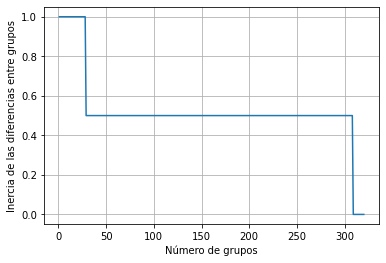

In [44]:
criterio_codo(z, 320)

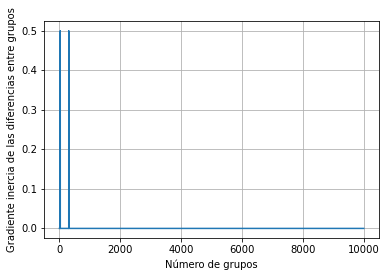

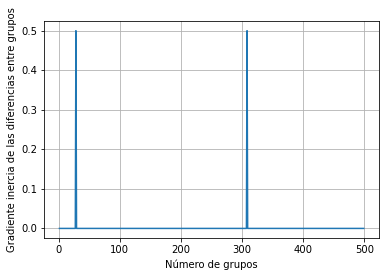

(None, None)

In [49]:
criterio_gradiente(z, 10000), 
criterio_gradiente(z, 500)

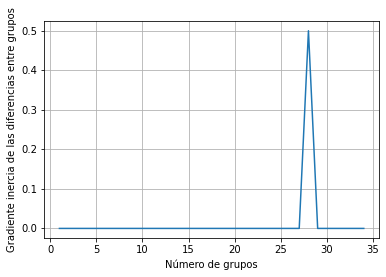

In [54]:
criterio_gradiente(z, 35)

<div style="text-align: justify">Observamos que con el criterio del codo no es del todo clara la cantidad de grupos, por lo que aplicamos el gradiente, con el que alcanzamos a observar que hay 2 picos (grupos óptimos), sin embargo elegimos el más cercano al 0 por comodidad. Nos fuimos acercando cada vez más, hasta determinar que lo óptimo eran 28 grupos.</div>

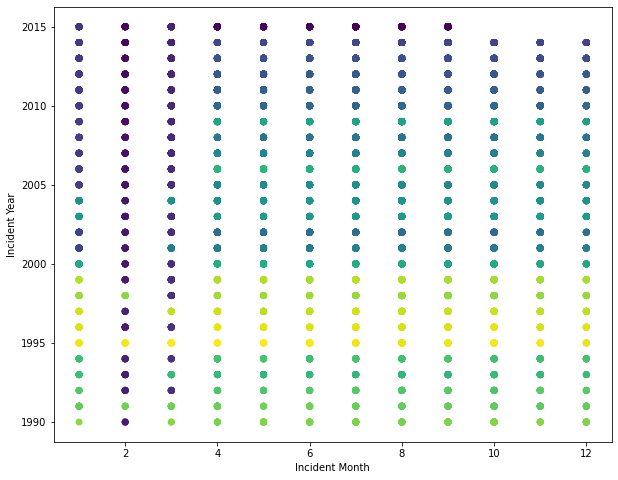

In [105]:
n_groups = 329
grupos = hierarchy.fcluster(z, n_groups, criterion = 'maxclust')

plt.figure(figsize = (10,8))
plt.scatter(data_cluster[:,0], data_cluster[:,1], c = grupos, cmap = 'viridis')
plt.xlabel('Incident Month')
plt.ylabel('Incident Year')
plt.show()

<div style="text-align: justify">Sin embargo, graficando 28 grupos, no se puede alcanzar a leer el gráfico. Por lo que lo aumentamos a 29 y nos pudimos dar cuenta que los meses en los que más ocurren accidentes son los primeros 4 del año y que casi siempre ha sido así, pero que desde aproximadamente el año 2000, estos han ido en aumento.</div>

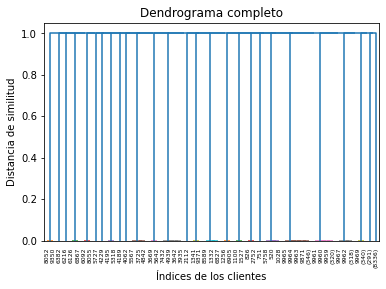

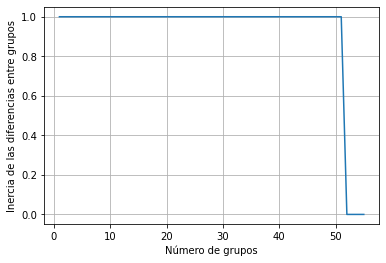

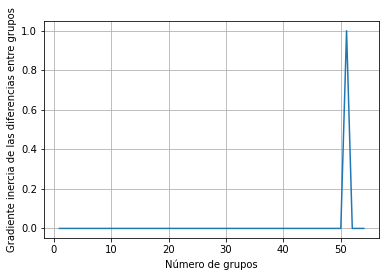

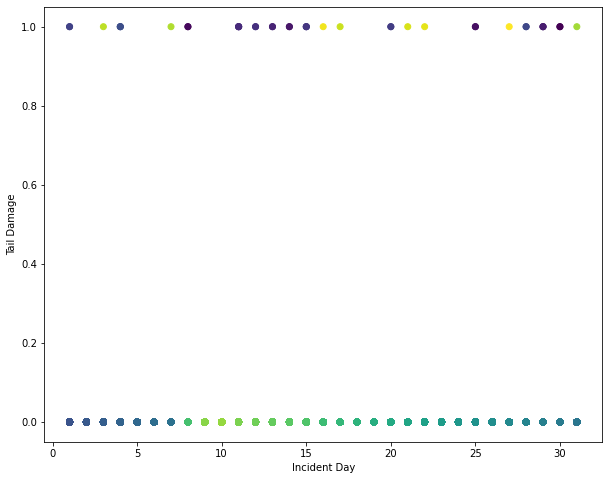

In [69]:
data_cluster2 = dfc.loc[:, ['Incident Day', 'Tail Damage']].values
data_cluster2



z2 = hierarchy.linkage(data_cluster2, metric = 'euclidean', method = 'single')



dn = hierarchy.dendrogram(z2, truncate_mode = 'level', p = 25)

plt.title('Dendrograma completo')
plt.xlabel('Índices de los clientes')
plt.ylabel('Distancia de similitud')
plt.show()


criterio_codo(z2, 55)
criterio_gradiente(z2, 55)



n_groups2 = 52
grupos2 = hierarchy.fcluster(z2, n_groups2, criterion = 'maxclust')

plt.figure(figsize = (10,8))
plt.scatter(data_cluster2[:,0], data_cluster2[:,1], c = grupos2, cmap = 'viridis')
plt.xlabel('Incident Day')
plt.ylabel('Tail Damage')
plt.show()

<div style="text-align: justify">Como segunda clusterización utilizamos también una clusterización jerárquica pero con diferente métrica y método. Como variables utilizamos el día en que ocurren accidentes y si el avión tenía daño en la cola o no. Nos sorprendió un poco que los criterios nos arrojaran que los grupos óptimos fueran 52, debido a que son solo dos situaciones, si tienen daño o no. Por su parte, la gráfica final nos muestra que hay más aviones que no tienen daño en la cola y que, aún sin daño, tienen más accidente, sobretodo los primeros y últimos días de mes.</div>

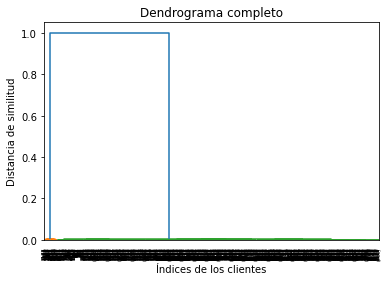

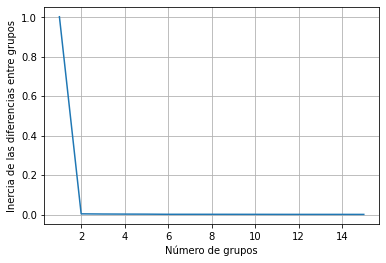

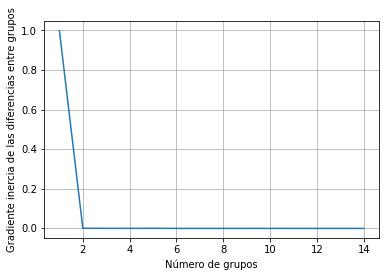

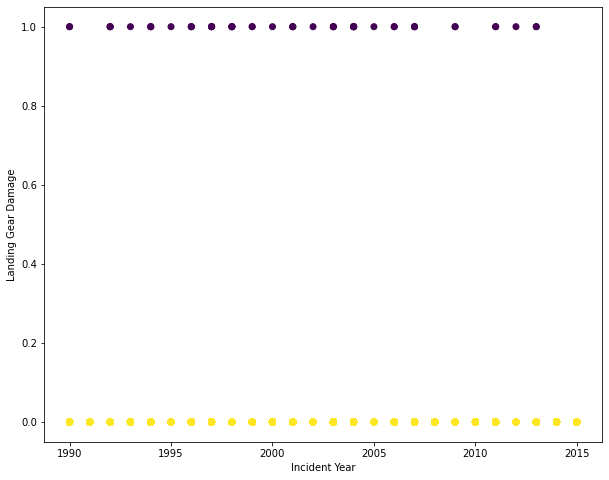

In [97]:
data_cluster3 = dfc.loc[:, ['Incident Year', 'Landing Gear Damage']].values
data_cluster3



z3 = hierarchy.linkage(data_cluster3, metric = 'canberra', method = 'average')



dn = hierarchy.dendrogram(z3, truncate_mode = 'level', p = 50)

plt.title('Dendrograma completo')
plt.xlabel('Índices de los clientes')
plt.ylabel('Distancia de similitud')
plt.show()


criterio_codo(z3, 15)
criterio_gradiente(z3, 15)



n_groups3 = 2
grupos3 = hierarchy.fcluster(z3, n_groups3, criterion = 'maxclust')

plt.figure(figsize = (10,8))
plt.scatter(data_cluster3[:,0], data_cluster3[:,1], c = grupos3, cmap = 'viridis')
plt.xlabel('Incident Year')
plt.ylabel('Landing Gear Damage')
plt.show()

<div style="text-align: justify">Dado que el anterior cluster nos dió 52 grupos como los óptimos, quisimo probar con otra variable para ver si esto se repetía. Por lo mismo, utilizamos otra variable que tuviera un sí y un no y en esta ocasión si nos dieron 2 grupos óptimos. Leyendo la gráfica, podemos inferir que los aviones a los que si les funcionan bien su tren de aterrizaje, son menos propensos a tener accidentes en general en el año.</div>

## <font color="blue">Conclusión</font>

En términos generales, nos ayudo a poner en práctica todo lo visto en este primer módulo, tanto a analizar, como a adecuar los datos otorgados, para poder realizar un análisis de estos.

En cuanto al procesamiento de los datos, la base de datos fue compleja y difícil de procesar, tanto al realizar la matriz como en los clusters, razón por la cual se nos dificulto un poco y reducimos a gran manera los datos.

Al realizar los clusters, nos dimos cuenta que incluso al filtrando y sustituyendo de valores no conocidos, al tener una gran cantidad de estos valores, su análisis no fue el esperado.